In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
df=pd.read_csv('/content/Topic modelling dataset.csv')
df.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [5]:
df['Article'][0]

'In the Washington of 2016, even when the policy can be bipartisan, the politics cannot. And in that sense, this year shows little sign of ending on Dec. 31. When President Obama moved to sanction Russia over its alleged interference in the U. S. election just concluded, some Republicans who had long called for similar or more severe measures could scarcely bring themselves to approve. House Speaker Paul Ryan called the Obama measures ”appropriate” but also ”overdue” and ”a prime example of this administration’s ineffective foreign policy that has left America weaker in the eyes of the world.” Other GOP leaders sounded much the same theme. ”[We have] been urging President Obama for years to take strong action to deter Russia’s worldwide aggression, including its   operations,” wrote Rep. Devin Nunes,  . chairman of the House Intelligence Committee. ”Now with just a few weeks left in office, the president has suddenly decided that some stronger measures are indeed warranted.” Appearing 

In [6]:
df.shape

(200, 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
#Text Pre-processing
corpus=[]
for i in range(len(df)):
  rp=re.sub('[^a-zA-Z]', '', df['Article'][i])
  rp=rp.lower()
  rp=rp.split()
  rp=[wnl.lemmatize(word) for word in rp if not word in set(stopwords.words('english'))]
  rp=''.join(rp)
  corpus.append(rp)

In [27]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus)

In [31]:
#Modelling
from sklearn.decomposition import LatentDirichletAllocation
model=LatentDirichletAllocation(n_components=4)
model.fit(X)

LatentDirichletAllocation(n_components=4)

In [32]:
topic_results=model.transform(X)

In [33]:
topic_results[0]

array([0.1251601 , 0.12515693, 0.62452287, 0.1251601 ])

In [34]:
topic_results[0].argmax()

2

The first Article belongs to 2nd topic

In [35]:
df['group']=topic_results.argmax(axis=1)
df.head()

,Article,group
0,"In the Washington of 2016, even when the polic...",2
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",1


<Axes: >

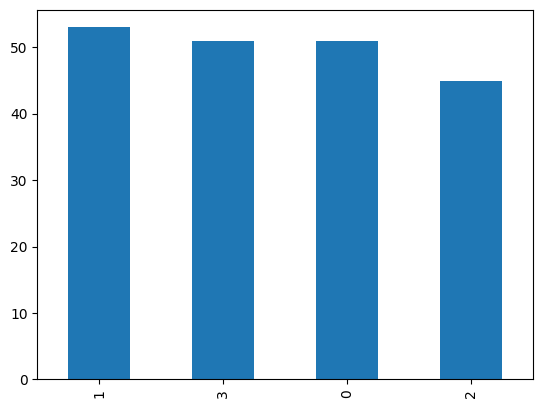

In [37]:
#Distribution of groups
df['group'].value_counts().plot(kind='bar')